## The Data

We will be working with a famous titanic data set for these exercises. Later on in the Machine Learning section of the course, we will revisit this data, and use it to predict survival rates of passengers. For now, we'll just focus on the visualization of the data with seaborn:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
sns.set_style('whitegrid')

In [3]:
titanic = sns.load_dataset('titanic')

## Show head of data

In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## check null value

In [5]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

# Exercises

## 1. What is the distribution of passengers’ ages?

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 [Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120'),
  Text(0, 140.0, '140')])

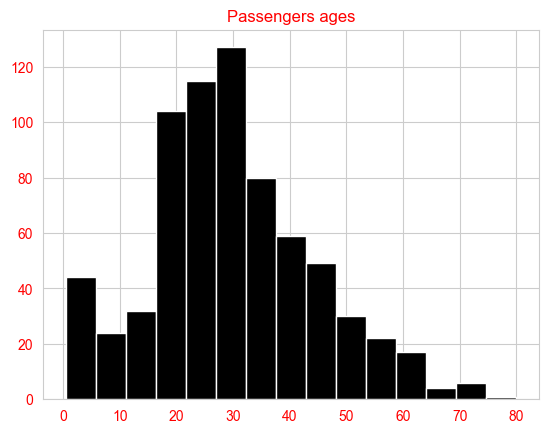

In [107]:
# plot here
plt.hist(titanic['age'], bins = 15, color= 'black')
plt.title('Passengers ages', color = 'red')
plt.xticks(color = 'red')
plt.yticks(color = 'red')

## 2. What is the distribution of passengers’ ages and fare ?
each figure in subplot

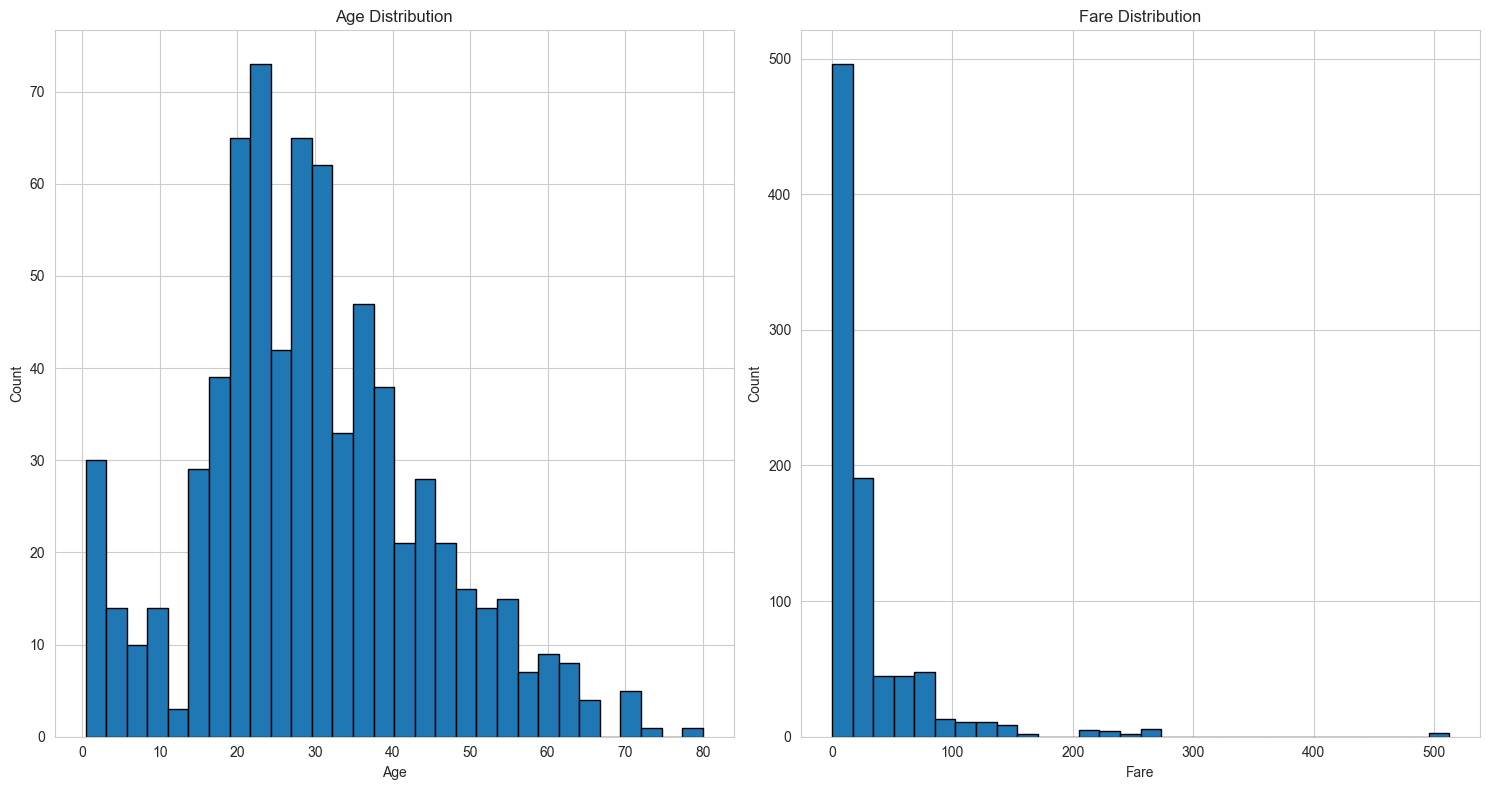

In [36]:
# plot here
plt.figure(figsize=(15,8))
plt.subplot(1, 2, 2)  
plt.hist(titanic['fare'], edgecolor="black", bins = 30)
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Count")

plt.subplot(1, 2, 1)  
plt.hist(titanic['age'], edgecolor="black", bins = 30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

C:\Users\Nvidia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nvidia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


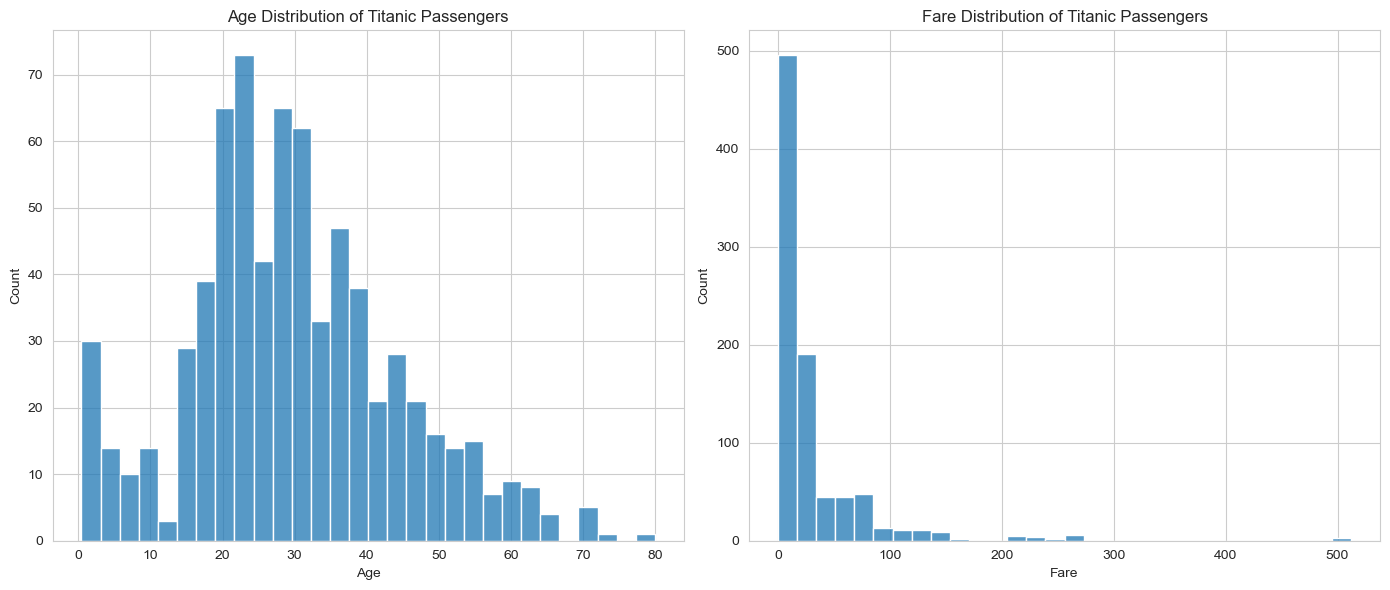

## 3. What is the relationship between age and fare?

Text(0.5, 0, 'age')

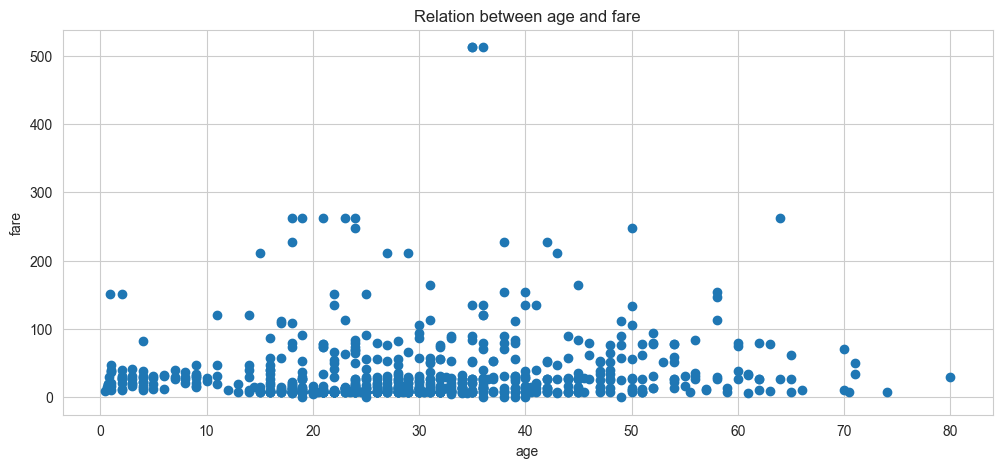

In [52]:
# plot here
plt.figure(figsize=(12,5))
plt.scatter(x = titanic['age'] , y = titanic['fare'])
plt.title('Relation between age and fare')
plt.ylabel('fare')
plt.xlabel('age')

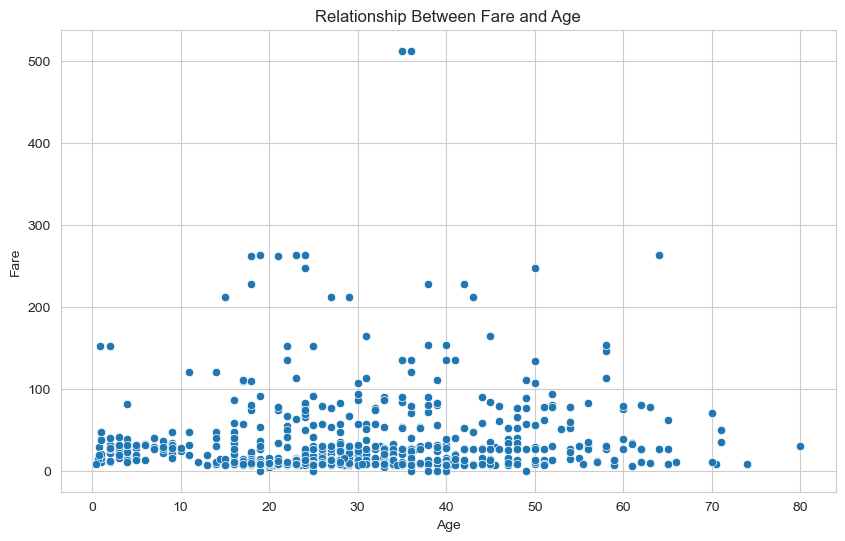

## 4. What is the relationship between survived and age?

Text(0.5, 0, 'age')

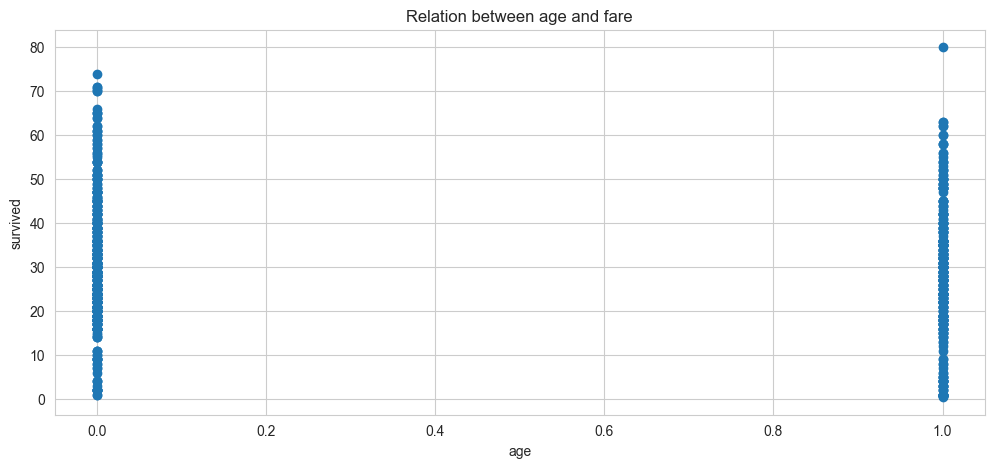

In [108]:
# plot here
plt.figure(figsize=(12,5))
plt.scatter(y = titanic['age'] , x = titanic['survived'])
plt.title('Relation between age and fare')
plt.ylabel('survived')
plt.xlabel('age')

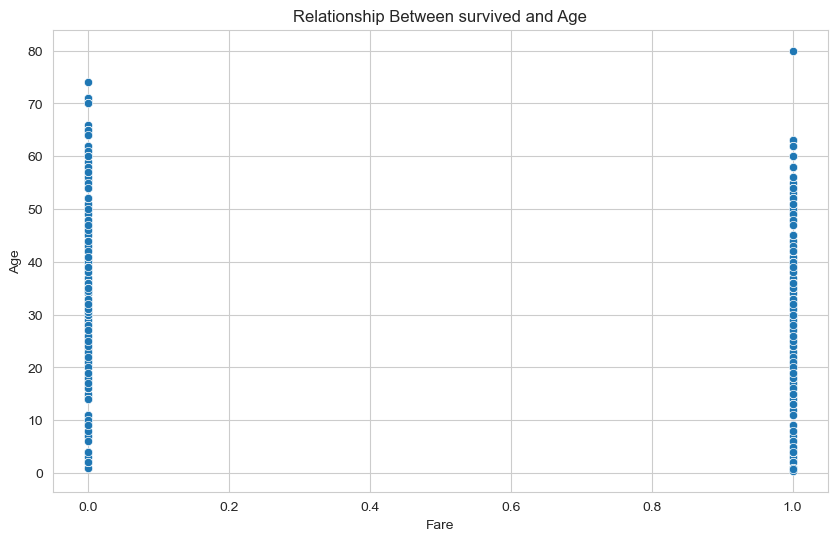

## 5. How does the survival rate vary by gender?

In [ ]:
# get mean of survived when column of sex == male
mean_male = titanic.loc[titanic['sex'] == 'male', 'survived'].mean()

np.float64(0.18890814558058924)

In [ ]:
# get mean of survived when column of sex == female
mean_female = titanic.loc[titanic['sex'] == 'female', 'survived'].mean()

np.float64(0.7420382165605095)

Text(0.5, 1.0, 'Survival Rate by Sex')

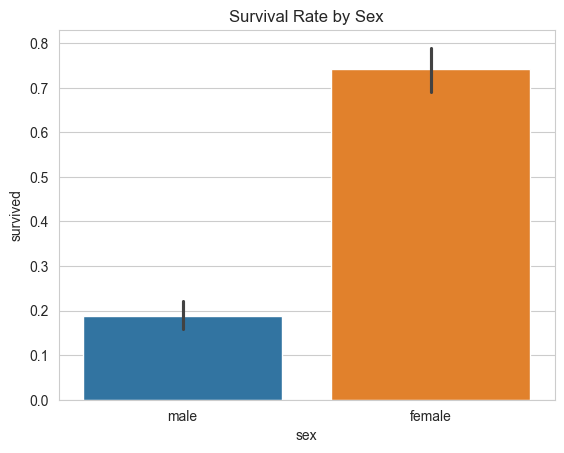

In [67]:
# plot here
sns.barplot(data=titanic, x='sex', y='survived', hue= 'sex')
plt.title("Survival Rate by Sex")

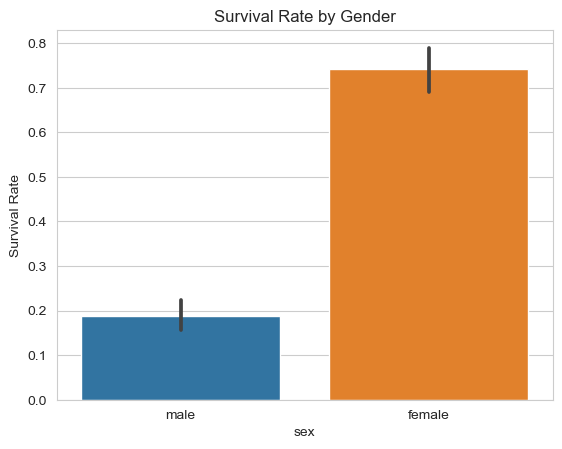

In [ ]:
# plot here

## 6. How does the survival rate vary by passenger class?

<Axes: ylabel='survived'>

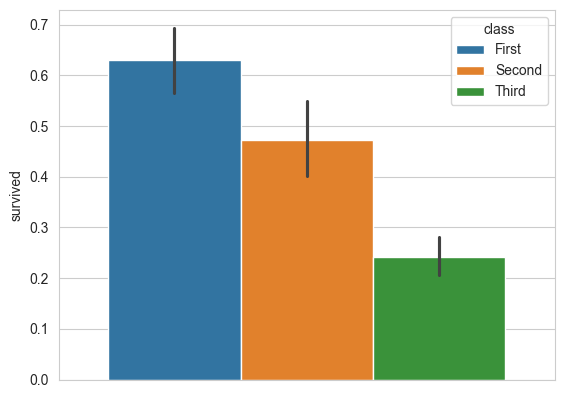

In [72]:
# plot here
sns.barplot(data = titanic, y = 'survived', hue = 'class')

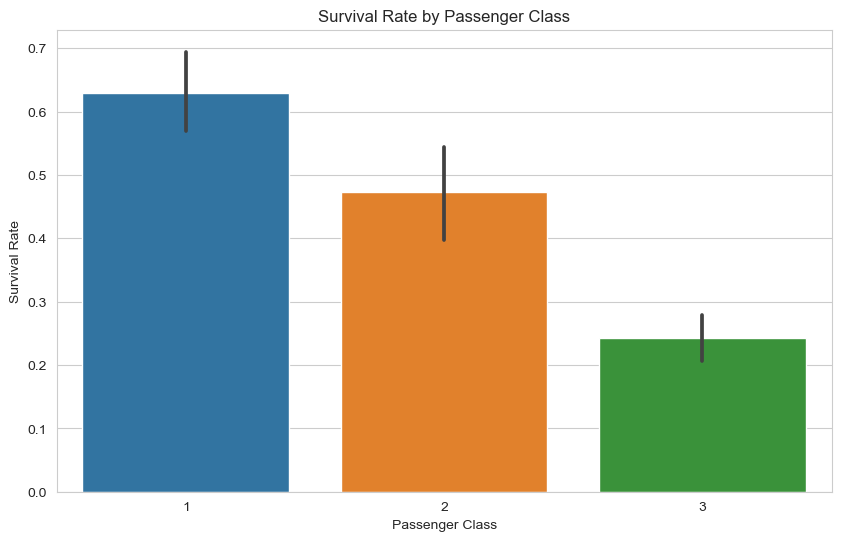

## 7. Survival Rate by Age Group

we are dividing the passengers' ages into 5 distinct age groups:
- Ages from 0 to 12 fall into the first bin (typically classified as "Child").
- Ages from 12 to 18 fall into the second bin (classified as "Teen").
- Ages from 18 to 35 fall into the third bin (classified as "Adult").
- Ages from 35 to 60 fall into the fourth bin (classified as "Middle-Aged").
- Ages from 60 to 80 fall into the fifth bin (classified as "Senior").

using pd.cut(data,bins,labels)

In [110]:
# Create age groups
bins = [0, 12, 18, 35, 60, 80]
labels = ['child', 'teen', 'adult', 'middle-aged', 'senior']
titanic['age_bind'] = pd.cut(titanic['age'], bins= bins, labels= labels)
print(titanic['age_bind'].unique())

['adult', 'middle-aged', NaN, 'child', 'teen', 'senior']
Categories (5, object): ['child' < 'teen' < 'adult' < 'middle-aged' < 'senior']


<Axes: xlabel='age_bind', ylabel='survived'>

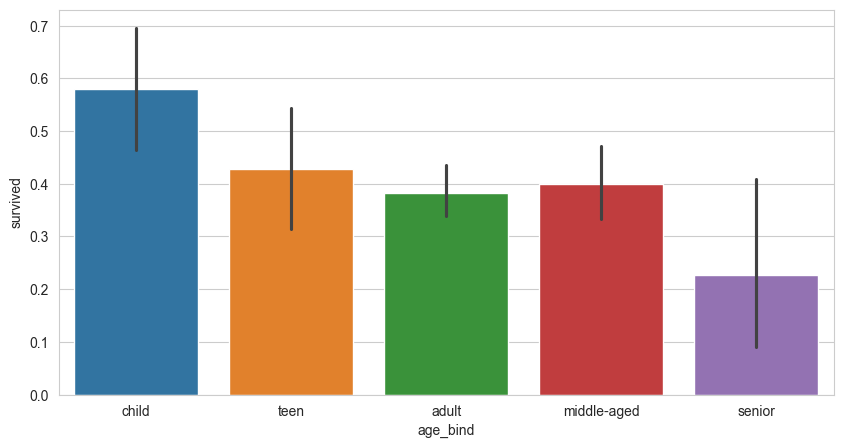

In [121]:
# plot here
plt.figure(figsize=(10,5))
sns.barplot(data=titanic, x='age_bind', y='survived', hue = 'age_bind', legend=False)

C:\Users\Nvidia\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


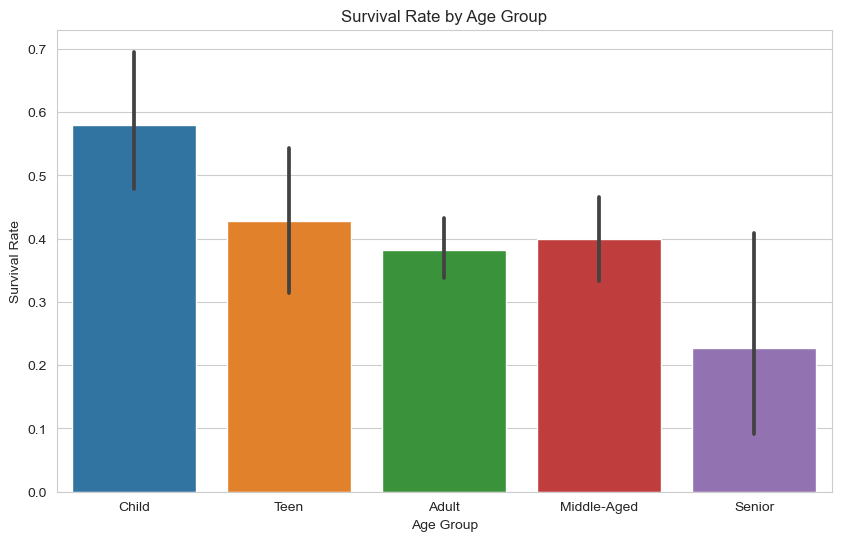

## 8. Survival Rate by Embarkation Point for each sex 

<Axes: xlabel='embarked', ylabel='count'>

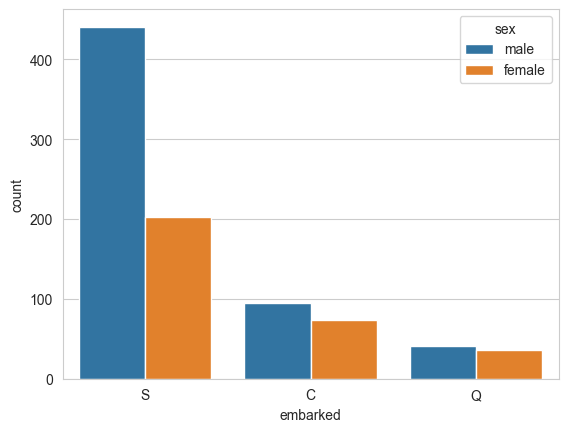

In [126]:
# plot here
sns.countplot(data=titanic, x='embarked', hue='sex')

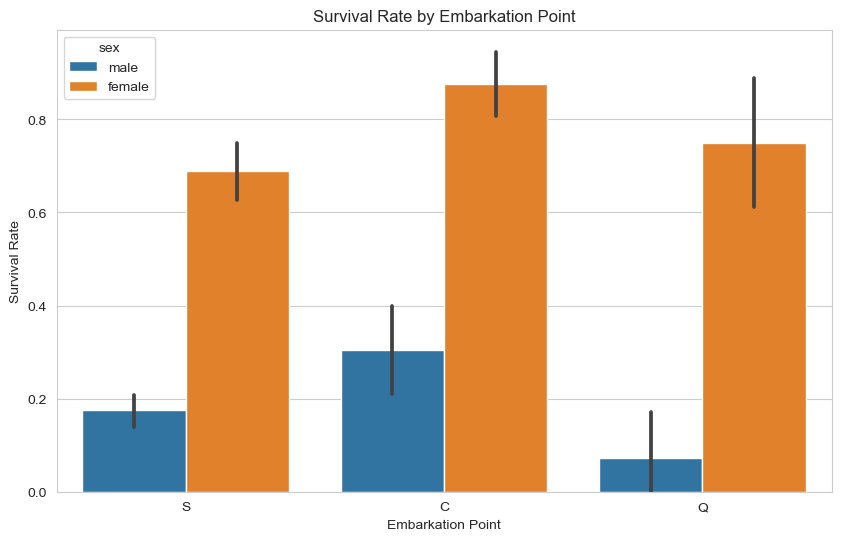

## 9. Counting of Passengers by pclass for each sex

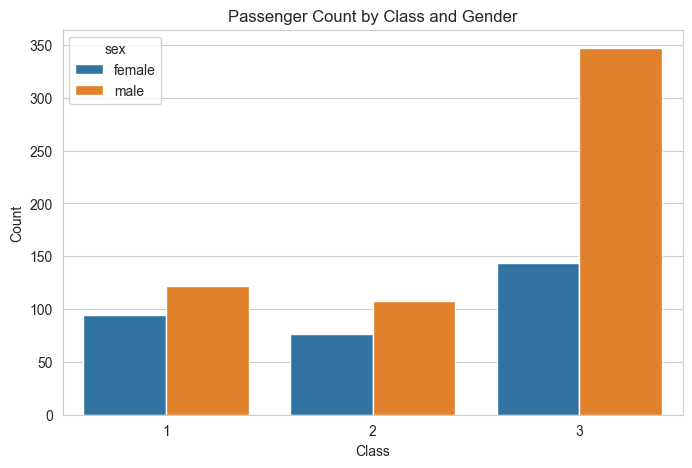

In [127]:
# plot here
plt.figure(figsize=(8,5))
sns.countplot(data=titanic, x='pclass', hue='sex')
plt.title("Passenger Count by Class and Gender")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

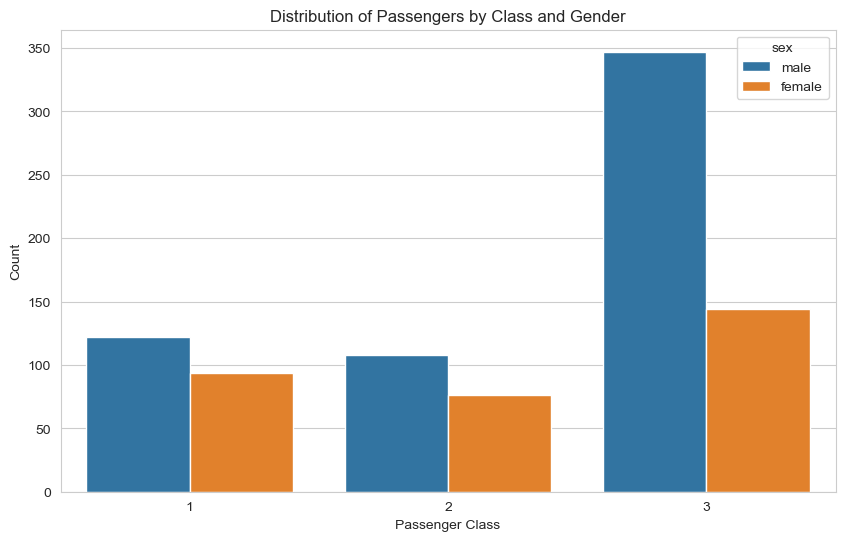

In [57]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'age_group'],
      dtype='object')

## 10. Counting of Passengers by class for each who

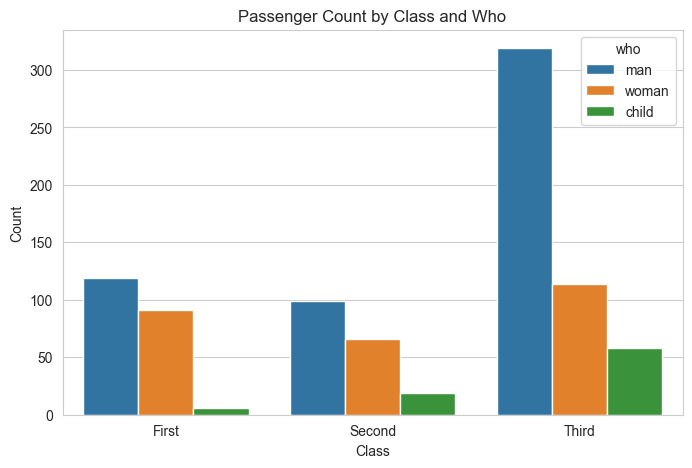

In [128]:
# plot here
plt.figure(figsize=(8,5))
sns.countplot(data=titanic, x='class', hue='who')
plt.title("Passenger Count by Class and Who")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

C:\Users\Nvidia\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Nvidia\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


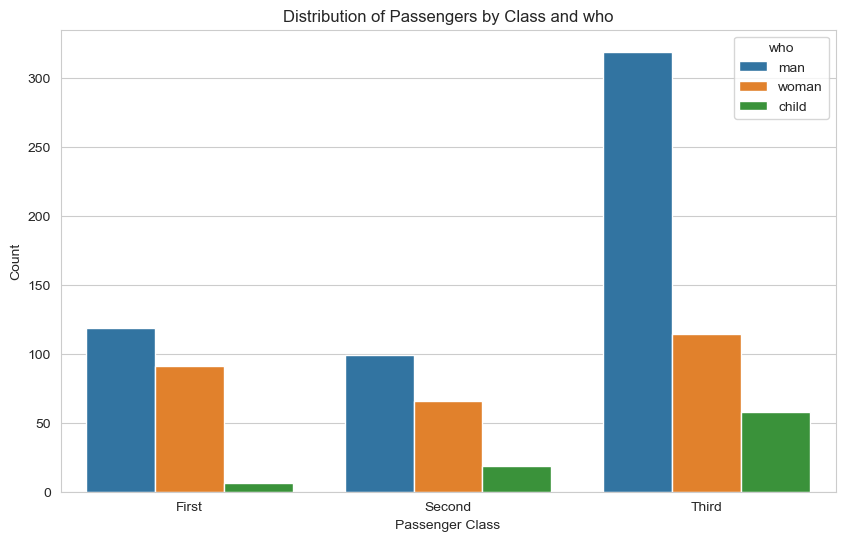

## 11. How many males and females were on board across different classes?

<Axes: xlabel='class', ylabel='survived'>

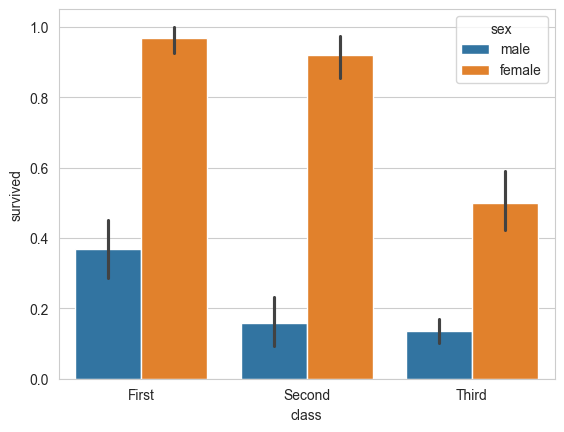

In [99]:
# plot here
sns.barplot(data=titanic, x="class", y="survived", hue="sex")

## 12. How does the survival rate vary by embarkation port?

<Axes: xlabel='embark_town', ylabel='survived'>

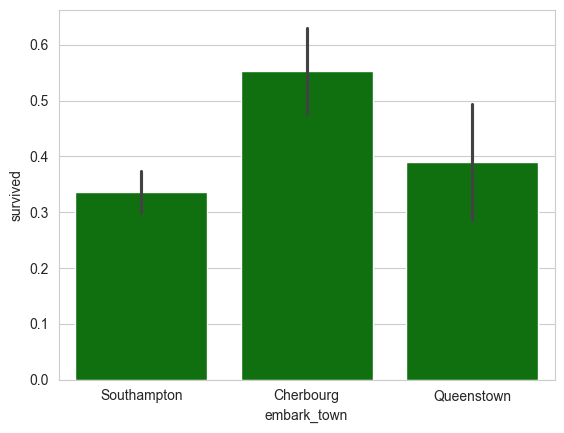

In [89]:
# plot here
sns.barplot(titanic, x ='embark_town' , y = 'survived',color= 'green')

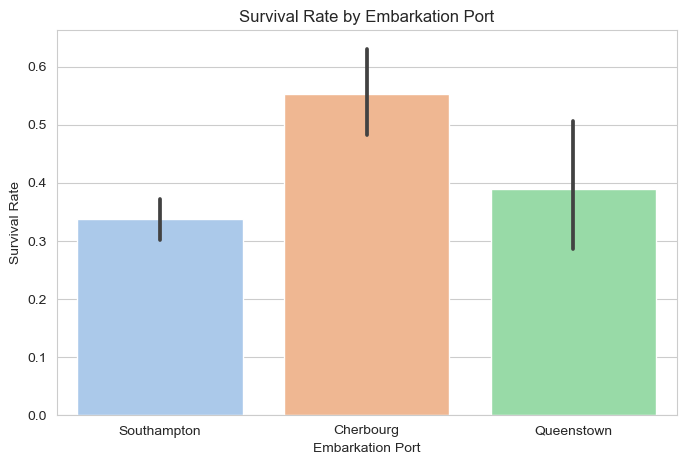

## 13. Correlation Heatmap

In [77]:
# get column with number value
numeric = titanic.select_dtypes('number')

<Axes: >

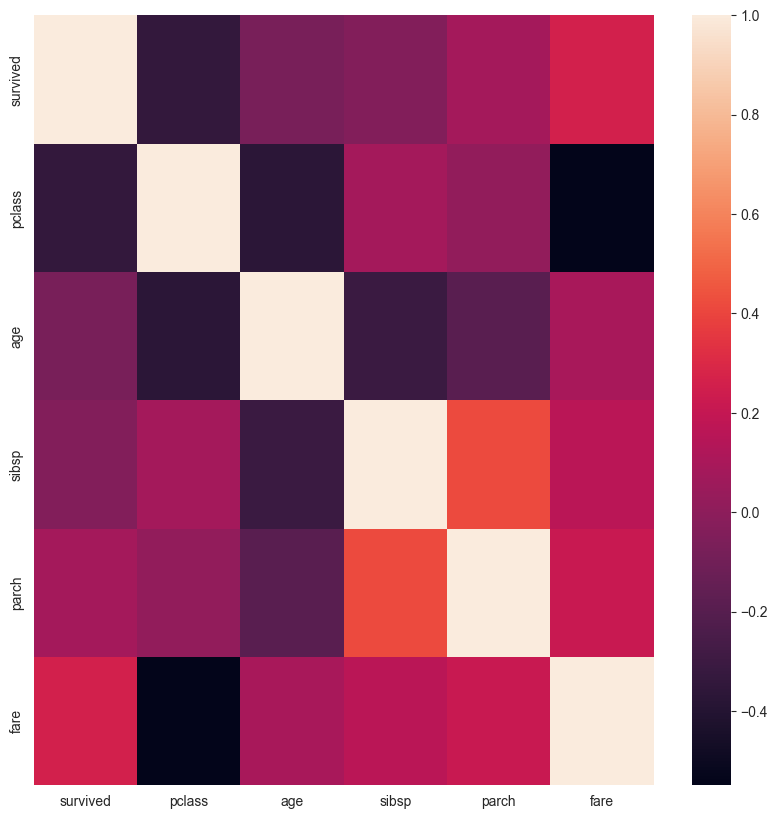

In [79]:
# plot here
plt.figure(figsize=(10,10))
sns.heatmap(numeric.corr())

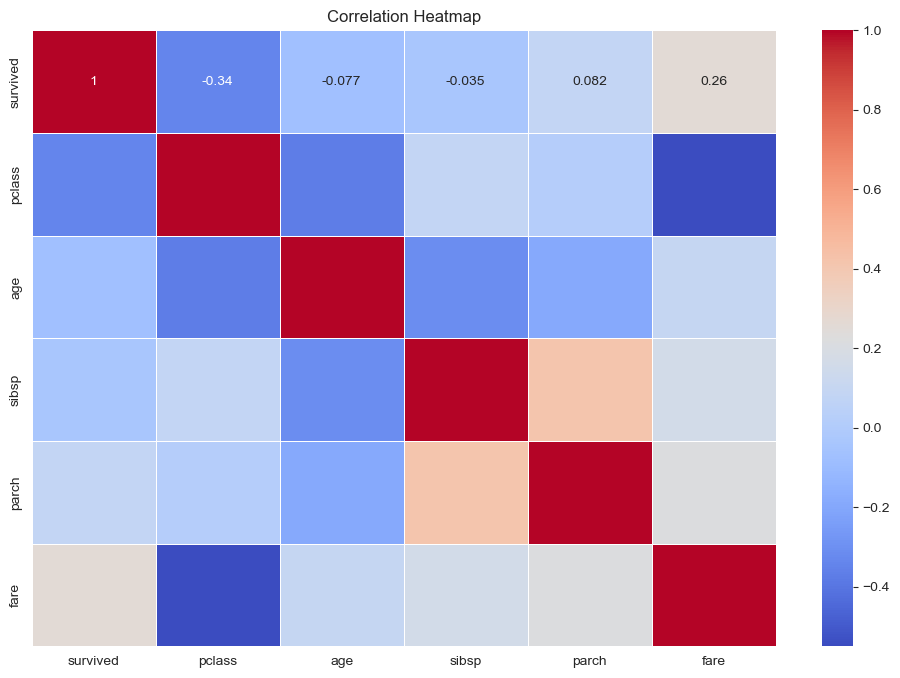

## 14. What is the distribution of passengers' fare based on their gender and survival status?
boxplot

<Axes: xlabel='sex', ylabel='fare'>

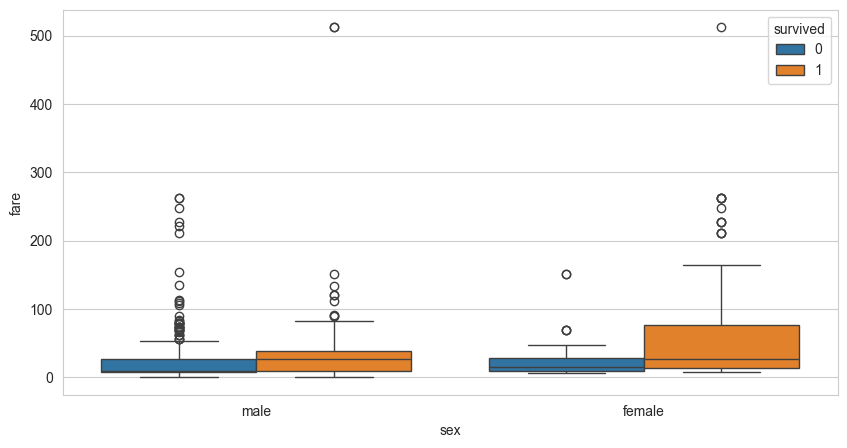

In [85]:
# plot here
plt.figure(figsize=(10,5))
sns.boxplot(titanic, x = 'sex', y = 'fare', hue = 'survived')

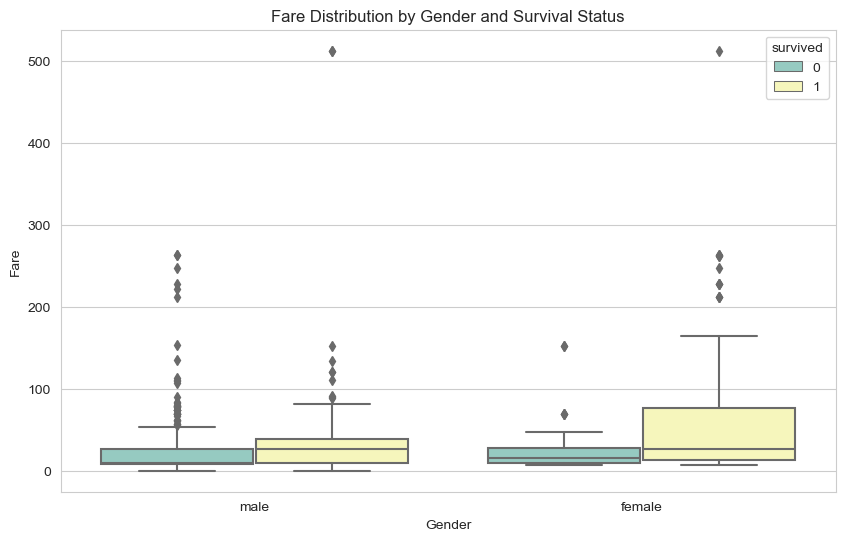

# Great Job!

### That is it for now! We'll see a lot more of seaborn practice problems in the machine learning section!